<a href="https://colab.research.google.com/github/mennamohamed13/Analysis-of-Bank-Debit-Collections/blob/main/task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd

import os
for dirname,  filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
#to read the dataset
df = pd.read_csv('bank_data.csv')

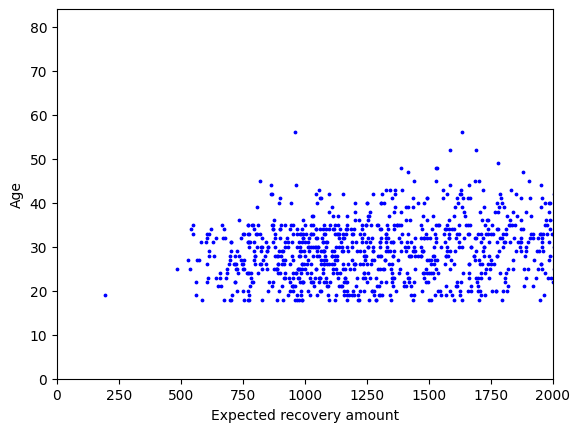

In [4]:
#scatter plot (age vs expected recovery amount)
from matplotlib import pyplot as plt
%matplotlib inline
plt.scatter(x=df['expected_recovery_amount'],y=df['age'],c="b",s=3)
plt.xlim(0,2000)
plt.ylim(0,84)
plt.xlabel("Expected recovery amount")
plt.ylabel("Age")
plt.show()

In [5]:
#Statistical test: age vs. expected recovery amount
from scipy import stats
#examining the average age of the customers just above and just below the threshold
#creating a new dataframe that satisfies the range
newdf= df.loc[(df['expected_recovery_amount']>=900) & (df['expected_recovery_amount']<1100)]
#group the data by the recovery_strategy column which is the level
level= newdf.groupby(['recovery_strategy'])
level['age'].describe().unstack()
#creating two separate groups one for level0 and one for level1
level0= newdf.loc[df['recovery_strategy']=="Level 0 Recovery"]['age']
level1= newdf.loc[df['recovery_strategy']=="Level 1 Recovery"]['age']
#performing the Kruskal-Wallis test
stats.kruskal(level0,level1)


KruskalResult(statistic=3.4572342749517513, pvalue=0.06297556896097407)

In [6]:
#Statistical test: sex vs. expected recovery amount
#number of customers in each level
crosstab = pd.crosstab(df.loc[(df['expected_recovery_amount']<1100) &
                              (df['expected_recovery_amount']>=900)]['recovery_strategy'],
                       df['sex'])
print(crosstab)

#chi-square test
chi2_stat, p_val, dof, ex = stats.chi2_contingency(crosstab)
print("p_val",p_val)
print("chi2_stat",chi2_stat)
print("dof",dof)
print("ex",ex)

sex                Female  Male
recovery_strategy              
Level 0 Recovery       32    57
Level 1 Recovery       39    55
p_val 0.5377947810444592
chi2_stat 0.3796422112341753
dof 1
ex [[34.53005464 54.46994536]
 [36.46994536 57.53005464]]


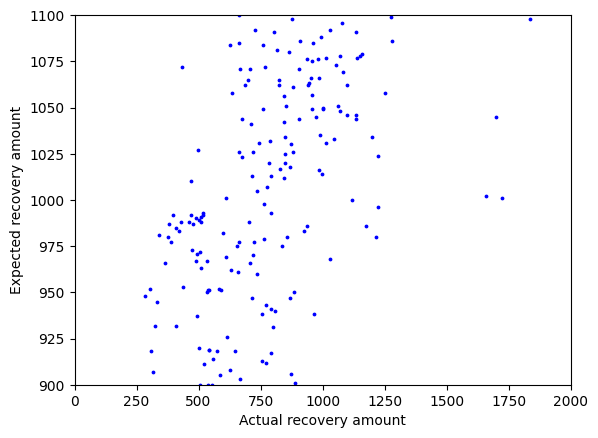

In [7]:
#Exploratory graphical analysis: recovery amount
plt.scatter(x=df['actual_recovery_amount'],y=df['expected_recovery_amount'],c="b",s=3)
plt.xlim(0,2000)
plt.ylim(900,1100)
plt.xlabel("Actual recovery amount")
plt.ylabel("Expected recovery amount")
plt.show()

In [8]:
#Statistical analysis: recovery amount
level['actual_recovery_amount'].describe().unstack()
level0= newdf.loc[df['recovery_strategy']=="Level 0 Recovery"]['actual_recovery_amount']
level1= newdf.loc[df['recovery_strategy']=="Level 1 Recovery"]['actual_recovery_amount']
#performing the Kruskal-Wallis test
stats.kruskal(level0,level1)



KruskalResult(statistic=65.37966302528878, pvalue=6.177308752803109e-16)

In [9]:
#repeat these steps for a smaller window of $950 to $1050
newdf1=df.loc[(df['expected_recovery_amount']>=950) & (df['expected_recovery_amount']<1050)]
l0=newdf1.loc[df['recovery_strategy']=='Level 0 Recovery']['actual_recovery_amount']
l1=newdf1.loc[df['recovery_strategy']=="Level 1 Recovery"]['actual_recovery_amount']
#performing the Kruskal-Wallis test
stats.kruskal(l0,l1)

KruskalResult(statistic=30.246000000000038, pvalue=3.80575314300276e-08)

In [12]:
#Regression modeling: no threshold
#I will use simple linear regression as we have a single predictor variable (independent>expected recovery amount) and a single outcome variable (dependent>actual recovery amount)

import statsmodels.api as sm

# Define X and y
X = newdf['expected_recovery_amount']
y = newdf['actual_recovery_amount']

# Add a constant to X for the intercept term
X = sm.add_constant(X)

# Build the linear regression model
model_first = sm.OLS(y, X).fit()

# Print out the model summary statistics
print(model_first.summary())

#R-squared and adjusted R-squared values provide an indication of the model's goodness of fit.
#The coefficient for 'expected_recovery_amount' shows the direction and strength of the relationship, and the p-value indicates its significance.




                              OLS Regression Results                              
Dep. Variable:     actual_recovery_amount   R-squared:                       0.261
Model:                                OLS   Adj. R-squared:                  0.256
Method:                     Least Squares   F-statistic:                     63.78
Date:                    Thu, 20 Jul 2023   Prob (F-statistic):           1.56e-13
Time:                            20:44:16   Log-Likelihood:                -1278.9
No. Observations:                     183   AIC:                             2562.
Df Residuals:                         181   BIC:                             2568.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

#here we can see that the coef "expected_recovery_amount" is a strong positive coefficient which indicates that there is a positive relationship between the two variables.
#the R-squared ranges from 0-1 and with higher values indicating a better fit of the model to the data. Here we have R-squared of 0.261.
#Smaller p-values (usually < 0.05) indicate statistically significant coefficients, and here we have p-value of 0.000.

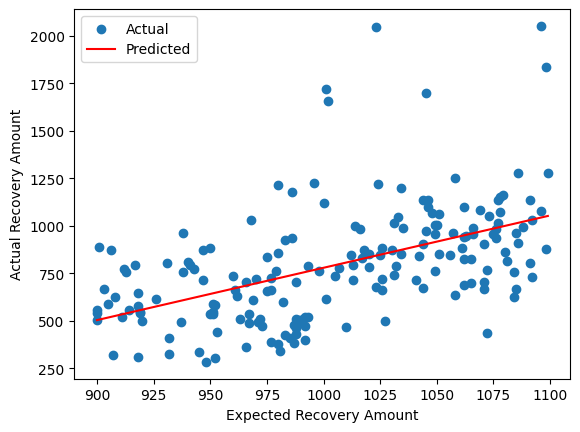

In [13]:
plt.scatter(X['expected_recovery_amount'], y, label='Actual')
plt.plot(X['expected_recovery_amount'], predictions, color='red', label='Predicted')
plt.xlabel('Expected Recovery Amount')
plt.ylabel('Actual Recovery Amount')
plt.legend()
plt.show()

In [15]:
#Regression modeling: adding true threshold
# Create a binary variable 'above_threshold'
newdf['indicator'] = (newdf['expected_recovery_amount'] >= 1000).astype(int)

# Define X and y for the second model
X_second = newdf[['expected_recovery_amount', 'indicator']]
y_second = newdf['actual_recovery_amount']

# Add a constant to X for the intercept term
X_second = sm.add_constant(X_second)

# Build the second linear regression model
model_second = sm.OLS(y_second, X_second).fit()

# Print out the model summary statistics
print(model_second.summary())

                              OLS Regression Results                              
Dep. Variable:     actual_recovery_amount   R-squared:                       0.314
Model:                                OLS   Adj. R-squared:                  0.307
Method:                     Least Squares   F-statistic:                     41.22
Date:                    Thu, 20 Jul 2023   Prob (F-statistic):           1.83e-15
Time:                            21:33:55   Log-Likelihood:                -1272.0
No. Observations:                     183   AIC:                             2550.
Df Residuals:                         180   BIC:                             2560.
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

<ipython-input-15-a0b81626a435>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['indicator'] = (newdf['expected_recovery_amount'] >= 1000).astype(int)


-Here we can see that the coef for the indicator is statistically significant (p-value<0.05) ,it indicates that the relationship between the expected recovery amount and the actual recovery amount is different between the two groups (above and below the threshold).


In [19]:
#Regression modeling: adjusting the window

# Create a binary variable 'above_threshold' for the new window
newdf1['above_threshold'] = (newdf1['expected_recovery_amount'] >= 1000).astype(int)

# Define X and y for the second model with the new window
X_second_new = newdf1[['expected_recovery_amount', 'above_threshold']]
y_second_new = newdf1['actual_recovery_amount']

# Add a constant to X for the intercept term
X_second_new = sm.add_constant(X_second_new)

# Build the second linear regression model for the new window
model_second_new = sm.OLS(y_second_new, X_second_new).fit()

# Print out the model summary statistics for the new window
print(model_second_new.summary())

                              OLS Regression Results                              
Dep. Variable:     actual_recovery_amount   R-squared:                       0.283
Model:                                OLS   Adj. R-squared:                  0.269
Method:                     Least Squares   F-statistic:                     18.99
Date:                    Thu, 20 Jul 2023   Prob (F-statistic):           1.12e-07
Time:                            22:01:49   Log-Likelihood:                -692.92
No. Observations:                      99   AIC:                             1392.
Df Residuals:                          96   BIC:                             1400.
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

<ipython-input-19-f8fb4f22db9d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf1['above_threshold'] = (newdf1['expected_recovery_amount'] >= 1000).astype(int)


Here shows that changing the window doesn't change the regression coefficient, it is still significant and the estimated impact is similar to the previous window. So we can conclude that the higher recovery strategy has a meaningful impact on the actual recovery amount for customers just above and just below the threshold.